In [2]:
#fft:快速傅立葉轉換
from numpy.fft import *

#a:1~6
a= range(1,7)
#對A做傅立葉轉換(換成傅立葉係數)
#傅立葉轉換的長度:6 (1~6)
L= fft(a)

#取出實部和虛部
for x in L:print('%0.4f%+.4fi'%(x.real, x.imag))

21.0000+0.0000i
-3.0000+5.1962i
-3.0000+1.7321i
-3.0000-0.0000i
-3.0000-1.7321i
-3.0000-5.1962i


In [3]:
'''
傅立葉的平移特性:往後移動，補上前面的
傅立葉的縮放特性:位置職放大 頻率會縮小 強度也會變
'''
import numpy as np
from numpy.fft import *
x = np.array([2,3,4,5,6,7,8,1])
#不用COPY會變得像指標
x1 = np.copy(x)

#奇數的位置乘上-1
x1[1::2] =x1[1::2]*-1

#傅立葉轉換
L= fft(x)
L1= fft(x1)
print("x=",x)
for x in L:print('%0.4f%+4fi'%(x.real, x.imag))

#平移後的(向下四格)
print("x1=",x1)
for x1 in L1:print('%0.4f%+4fi'%(x1.real, x1.imag))


x= [2 3 4 5 6 7 8 1]
36.0000+0.000000i
-9.6569+4.000000i
-4.0000-4.000000i
1.6569-4.000000i
4.0000+0.000000i
1.6569+4.000000i
-4.0000+4.000000i
-9.6569-4.000000i
x1= [ 2 -3  4 -5  6 -7  8 -1]
4.0000+0.000000i
1.6569+4.000000i
-4.0000+4.000000i
-9.6569-4.000000i
36.0000+0.000000i
-9.6569+4.000000i
-4.0000-4.000000i
1.6569-4.000000i


In [14]:
'''
捲積(Convolution)
'''

x = [1,2,3,4]
y = [5,6,7,8]

#一般的乘加
'''
(1 2 3 4)。(5 0 0 0)
(1 2 3 4)。(6 5 0 0)
(1 2 3 4)。(7 6 5 0)
(1 2 3 4)。(8 7 6 5)
(1 2 3 4)。(0 8 7 6)
(1 2 3 4)。(0 0 8 7)
(1 2 3 4)。(0 0 0 8)
'''
z = np.convolve(x,y)
a=y+y
z1 = np.convolve(x, a,'valid')[:-1]

print(z)
print(z1)

[ 5 16 34 60 61 52 32]
[60 66 68 66]


In [4]:
'''
fft，計算向量的DFT。
ifft，計算向量的反DFT。
fft2，計算矩陣的DFT。
ifft2，計算矩陣的反DFT。
fftshift，平移轉換。
'''

'\nfft，計算向量的DFT。\nifft，計算向量的反DFT。\nfft2，計算矩陣的DFT。\nifft2，計算矩陣的反DFT。\nfftshift，平移轉換。\n'

In [5]:
import numpy as np
from numpy.fft import *
a1 = np.ones((8,8))
print(a1)
b1 = fft2(a1).real
#DC值:自己的相加
#只有DC值有值 因為其他自己內的值可被削掉
print(b1)
b1=fftshift(b1)
print(b1)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[64.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 64.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [6]:
a11=np.array([100,200])
a11=np.tile(a11,4)
print(a11)
b12=fft(a11).real
print(b12)

a2 = np.array([[100,200],[100,200]])
a2 = np.tile(a2,(4,4))
print(a2)
b2 = fft2(a2).real
print(b2)
b2=fftshift(b2)
print(b2)

[100 200 100 200 100 200 100 200]
[1200.    0.    0.    0. -400.    0.    0.    0.]
[[100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]
 [100 200 100 200 100 200 100 200]]
[[ 9600.     0.     0.     0. -3200.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]]
[[    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0. 

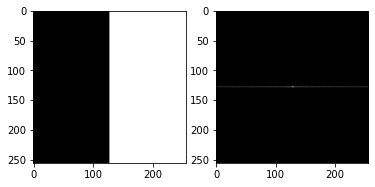

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage import exposure
import numpy as np
from numpy.fft import *
a = np.hstack((np.zeros((256,128)),np.ones((256,128))))
af = fftshift(fft2(a))
af1 = exposure.rescale_intensity(np.log(1+abs(af)), out_range=(0.0, 1.0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear',cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(af1,interpolation='bilinear', cmap=cm.Greys_r)
plt.show()

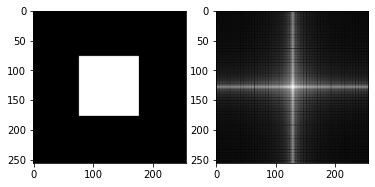

In [8]:
a = np.zeros((256,256))
a[77:177,77:177] =1
af = fftshift(fft2(a))
af1 = exposure.rescale_intensity(np.log(1+abs(af)),      out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear',cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(af1,interpolation='bilinear', cmap=cm.Greys_r)
plt.show()

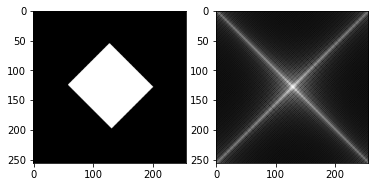

In [9]:
x,y = np.meshgrid(range(256),range(256))
a= (x+y<329) &(x+y>182) & (x-y >-67) & (x-y<73)
af = fftshift(fft2(a))
af1 = exposure.rescale_intensity(np.log(1+abs(af)), out_range=(0.0, 1.0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear',cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(af1,interpolation='bilinear', cmap=cm.Greys_r)
plt.show()

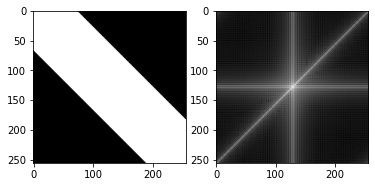

In [10]:
x,y = np.meshgrid(range(256),range(256))
a=   (x-y >-67) & (x-y<73)
af = fftshift(fft2(a))
af1 = exposure.rescale_intensity(np.log(1+abs(af)), out_range=(0.0, 1.0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear',cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(af1,interpolation='bilinear', cmap=cm.Greys_r)
plt.show()


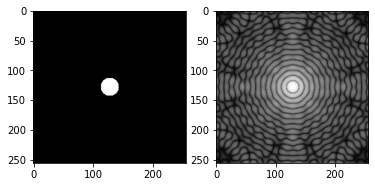

In [11]:
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
z= np.sqrt(x**2+y**2)
a = (z<15)*1
af = fftshift(fft2(a))
af1 = exposure.rescale_intensity(np.log(1+abs(af)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear',cmap=cm.Greys_r)
ax2 = fig.add_subplot(122)
ax2.imshow(af1,interpolation='bilinear', cmap=cm.Greys_r)
plt.show()

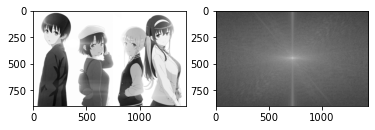

In [12]:
from skimage import io

c = io.imread('anime.jpg')

cf = fftshift(fft2(c))
cf1 = exposure.rescale_intensity(np.log(1+abs(cf)), out_range=(0.0, 1.0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(c,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(cf1, cmap='gray')

plt.show()

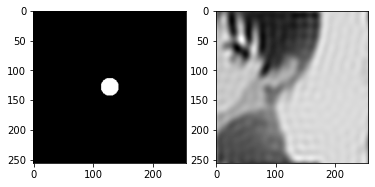

In [13]:
'''
理想濾波
'''
c2 = c[145:401,180:436]
cf = fftshift(fft2(c2))
d= 15
#創造256*256的圖片 中間有值(圓形)
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
#高頻的地方挖掉
f= (x**2+y**2 <d**2)*1
#對傅立葉轉換後的係數處理
cf1 = cf*f
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(f,cmap='gray')
ax2 = fig.add_subplot(122)
#反向傅立葉轉換
ax2.imshow(np.abs(ifft2(cf1)), cmap='gray')
plt.show()

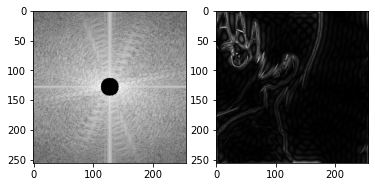

In [14]:
'''
高通濾波
'''
cf = fftshift(fft2(c2))
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
z= np.sqrt(x**2+y**2)
f= (z>15)*1
cf1 = cf*f
cffft = exposure.rescale_intensity(np.log(1+abs(cf1)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cffft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cf1)), cmap='gray')
plt.show()

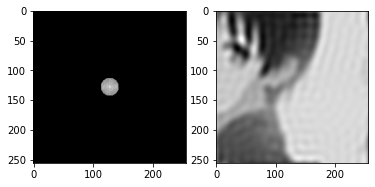

In [15]:
'''
低通濾波
'''
cf = fftshift(fft2(c2))
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
z= np.sqrt(x**2+y**2)
f= (z<15)*1
cf1 = cf*f
cffft = exposure.rescale_intensity(np.log(1+abs(cf1)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cffft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cf1)), cmap='gray')
plt.show()

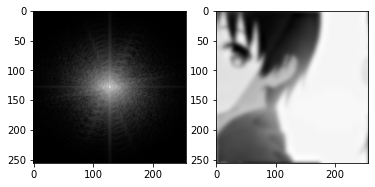

In [16]:
'''
Butterworth 低通濾波
:邊界緩和一些
'''
cf = fftshift(fft2(c2))
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
D=15.0
bl = 1.0/(1.0+((x**2+y**2)/D**2)**2)
cfbl = cf*bl
cfblfft = exposure.rescale_intensity(np.log(1+abs(cfbl)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cfblfft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cfbl)), cmap='gray')
plt.show()


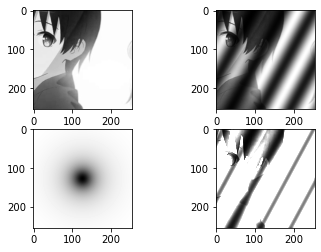

In [17]:
'''
同態濾波器: 通常讓影像品質變好
'''
from skimage import util


def homfilt(im, cutoff,order, lowgain, highgain):
    u=util.img_as_ubyte(im)
    u[np.where(u==0)] =1
    lg = np.log(u.astype(float))
    ft = fftshift(fft2(lg))
    rows, cols = im.shape
    rr = np.arange(-(rows//2),(rows+1)//2, 1.0)
    cr = np.arange(-(cols//2),(cols+1)//2, 1.0)
    y,x = np.meshgrid(cr,rr)
    bl = 1.0/(1.0+0.414*((x*x+y*y)/cutoff**2)+order)
    f= lowgain + (highgain-lowgain)*(1.0-bl)
    b= f*ft
    lb = abs(ifft2(b))
    return np.exp(lb),f

c3 = c[145:400,180:435]
ns = util.img_as_float(c3)
ar = range(255)
x,y = np.meshgrid(ar,ar)
nx = ns*(0.5+0.4*np.sin((1.3*x+0.7*y-50)/16))

#同態濾波
nh,f = homfilt(nx,10,2,0.5,2)

cfghfft = exposure.rescale_intensity(np.log(1+abs(f)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.imshow(c3,cmap='gray')
ax2 = fig.add_subplot(222)
ax2.imshow(nx,cmap='gray')
ax3 = fig.add_subplot(223)
ax3.imshow(f,cmap='gray')
ax4 = fig.add_subplot(224)
ax4.imshow(nh/16,vmax = 16, cmap='gray')
plt.show()
